# Physics 256
## Radioactive Decay

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Alpha_Decay.svg/500px-Alpha_Decay.svg.png" width=400px>

## Last Time

- plot types in Matplotlib
- graphical solutions of transcendental equations

## Today

- Radioactive Decay


## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'

## Radioactive Decay

We want to analyze the radioactive decay of some sample where there are $N(t)$ atoms at some time $t$.  The behavior of $N(t)$ is governed by the differential equation:

\begin{equation}
\frac{dN}{dt} = -\frac{N}{\tau}
\tag{1}
\end{equation}

where $\tau$ is the time constant of the decay.  The solution to this first order differential equation can be found by separation and integration:

\begin{align}
\int_{N(0)}^{N(t)} \frac{dN}{N} &= - \int_0^t \frac{dt}{\tau} \\
\log\frac{N(t)}{N(0)} &= -\frac{t}{\tau} \\
N(t) &= N(0) \mathrm{e}^{-t/\tau}
\end{align}

### Plot $N(t)/N(0)$ vs. $t/\tau$

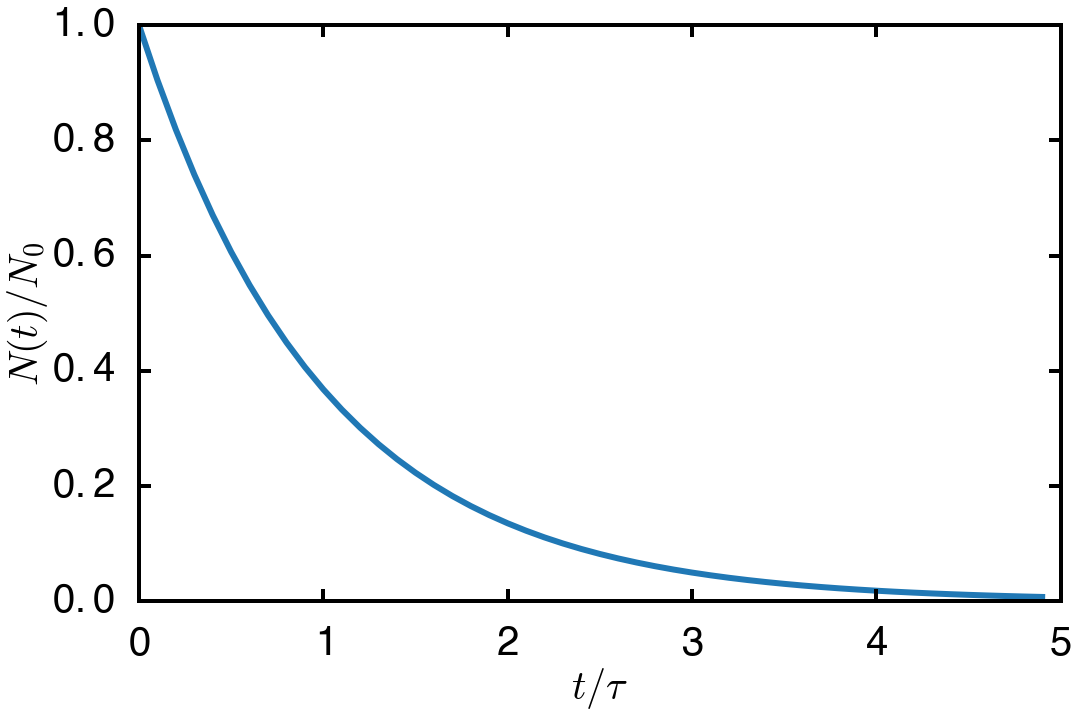

In [2]:
t = np.arange(0,5,0.1)
plt.plot(t,np.exp(-t))
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')

## A Numerical Approach

### Question: How do we approximate the ODE on a discrete set of grid points?

### Taylor Expansions

\begin{equation}
f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2 f}{dt^2} \Delta t^2 + \mathrm{O}\left(\Delta t^3\right)
\end{equation}

if $\Delta t \ll 1$ we can rearrange to get the discrete **forward derivative**:

\begin{equation}
\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t)}{\Delta t} + \mathrm{O}\left(\Delta t\right) .
\end{equation}

### Application to the Radioactive Decay Problem

We have:
\begin{align}
\frac{dN(t)}{dt} & = -\frac{N}{\tau} \\
\Rightarrow \frac{N(t+\Delta t) - N(t)}{\Delta t} &= -\frac{N(t)}{\tau} + \mathrm{O}\left(\Delta t\right) \\
N(t+\Delta t) &\approx \left(1-\frac{\Delta t}{\tau}\right)N(t)
\end{align}
 

If we define an array $t/\tau = n \Delta t$ where $n \in \mathbb{Z}$ is an integer then this is a simple iterative initial value problem.  The **accuracy** of the numerical solution depends on the size of $\Delta t$.  This approach using the lowest order approximation to the derivitive is called the **Euler Method**.

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
Write a program that employs the Euler Method to solve the radioactive decay problem and compare with the exact solution.
</div>


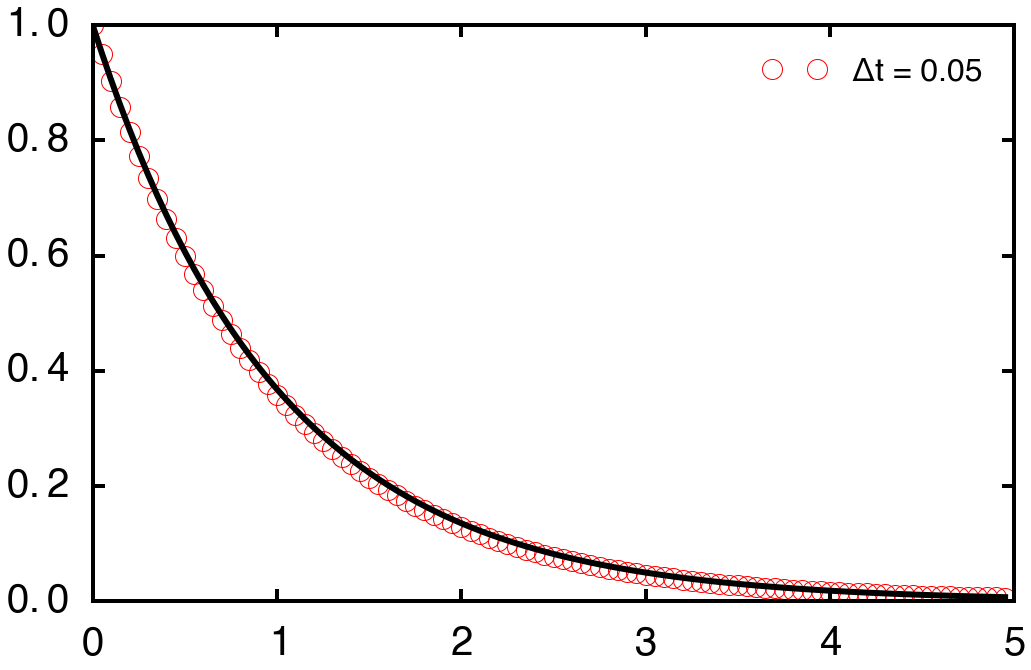

In [11]:
Δt = 0.05
t = np.arange(0.0,5.0,Δt)
N = np.ones_like(t)
for n in range(len(N)-1):
    N[n+1] = (1-Δt)*N[n]
    
plt.plot(t,N,'o',mfc='None',mec='red',label='Δt = %3.2f'%Δt)
plt.plot(t,np.exp(-t),'k-')
plt.legend()

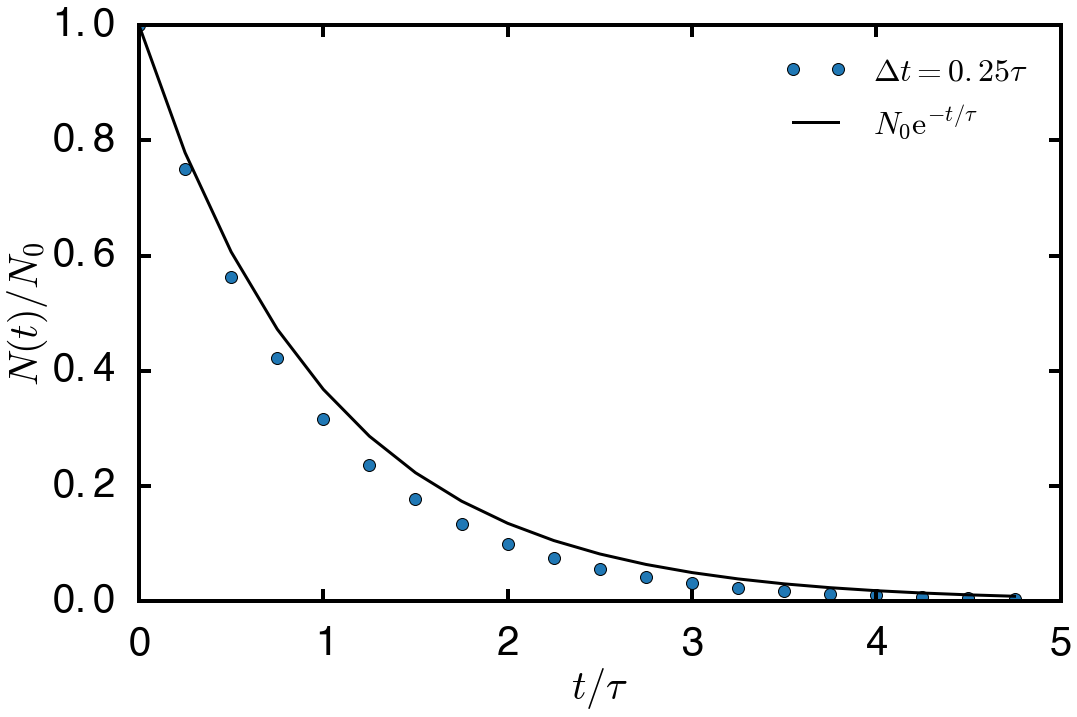

In [5]:
%run ../../Examples/Simple_ODEs/radioactive_decay.py

In [ ]:
# %load ../../Examples/Simple_ODEs/radioactive_decay.py
# filename: radioactive-decay.py
# author: Adrian Del Maestro
# date: 09.13.2011

# Use the Euler method to iteratively solve a first order differential equation
# describing the decay of 235-Uranium and compare with the exact solution

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('notebook')

# main program
def main():

    # define and initialize 
    dt  = 1.0/4  # in units of tau
    t = np.arange(0.0,5,dt)
    num_steps = t.size
    N = np.zeros_like(t) # in units of N_0)
    N[0] = 1

    # get the iterative Euler solution
    for n in range(1,len(t)):
        N[n] = (1.0-dt)*N[n-1]

    # plot the numerical solution
    numLab = r'$\Delta t = %3.2f \tau$' % dt
    plt.plot(t,N,linestyle='None',marker='o', markersize=6, label=numLab)

    # plot the analytical solution
    anLab = r'$N_0\mathrm{e}^{-t/\tau}$'
    plt.plot(t,N[0]*np.exp(-t),linestyle='-',marker='None', color='black',
           linewidth=1.5, label=anLab)
    plt.xlabel(r'$t/\tau$')
    plt.ylabel(r'$N(t)/N_0$')

    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()
